In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("OpenCV Version: ",cv2.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)

def imshow(title: str = "",
           image: np.ndarray = None,
           subplot: bool = False,
           row: int = 0, col: int = 0, num: int = 0) -> None:
    """
    Display an image using matplotlib.pyplot.

    Parameters:
    - title (str): Title to be displayed above the image.
    - image (np.ndarray): Input image as a NumPy array (BGR format).
    - subplot (bool): If True, the image is displayed as a subplot.
    - row (int): Row position for the subplot.
    - col (int): Column position for the subplot.
    - num (int): Subplot number.

    Returns:
    None

    Example:
    imshow(title="Example Image", image=my_image)
    """
    if subplot:
        plt.subplot(row, col, num)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

OpenCV Version:  4.8.0
Matplotlib version: 3.7.1
NumPy version: 1.25.2


In [ ]:
def histogram(img,label):
    imshow(label, img, subplot=True, row=1, col=2, num=1)
    freq = {}
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            r = img[row][col]
            if r in freq:
                freq[r] += 1
            else:
                freq[r] = 1
    for i in range(256):
        if i not in freq:
            freq[i] = 0
    plt.subplot(1,2,2)
    plt.bar(freq.keys(), freq.values())
    plt.title(f"{label} Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Frequency")
    plt.show()

## 1. Dark Image

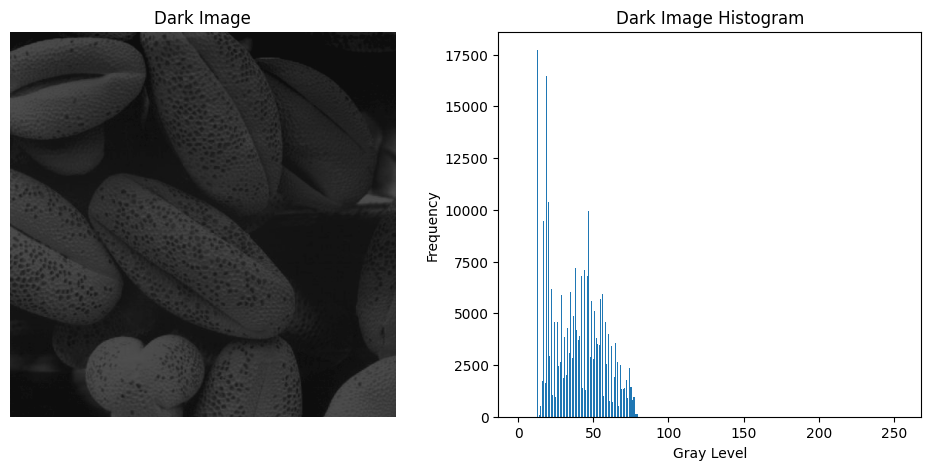

In [ ]:
plt.figure(figsize=(12,5))
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0320(4)(bottom_left).tif",0)
histogram(img, "Dark Image")

## 2. Light Image

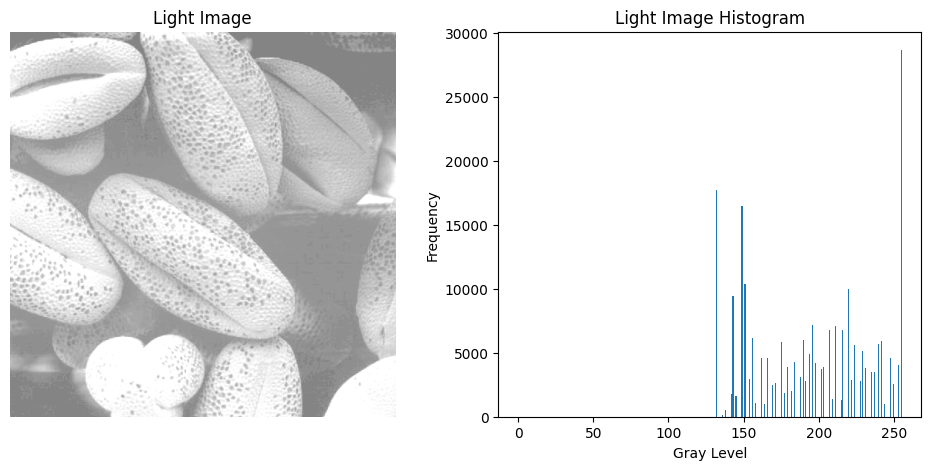

In [ ]:
plt.figure(figsize=(12,5))
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0320(1)(top_left).tif",0)
histogram(img, "Light Image")

## 3. High Contrast Image

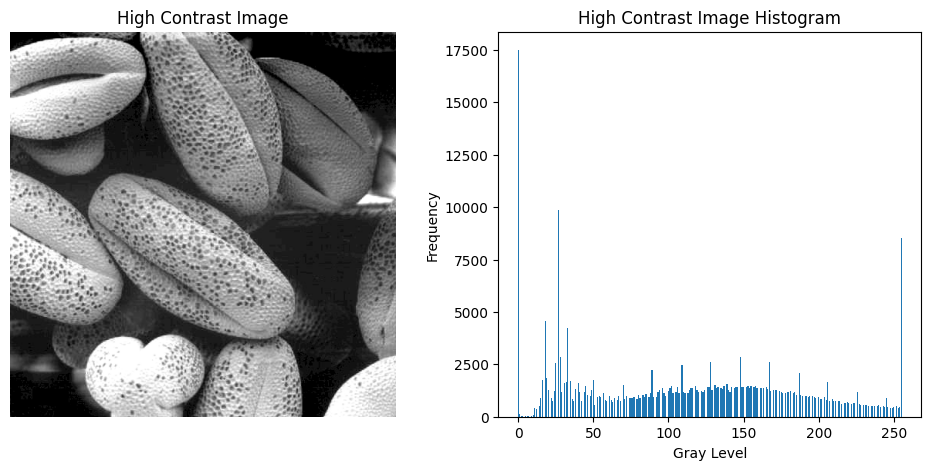

In [ ]:
plt.figure(figsize=(12,5))
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0316(3)(third_from_top).tif",0)
histogram(img, "High Contrast Image")

## 4. Low Contrast Image

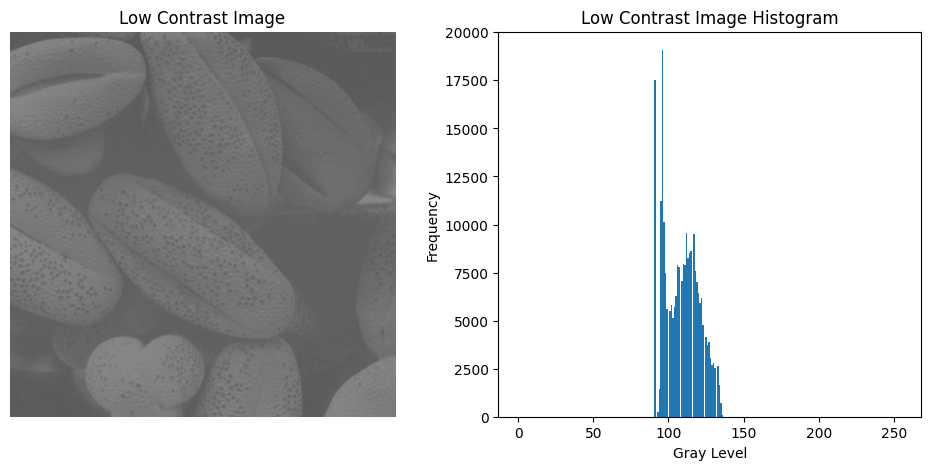

In [ ]:
plt.figure(figsize=(12,5))
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif",0)
histogram(img, "Low Contrast Image")

## Historgram Equilization

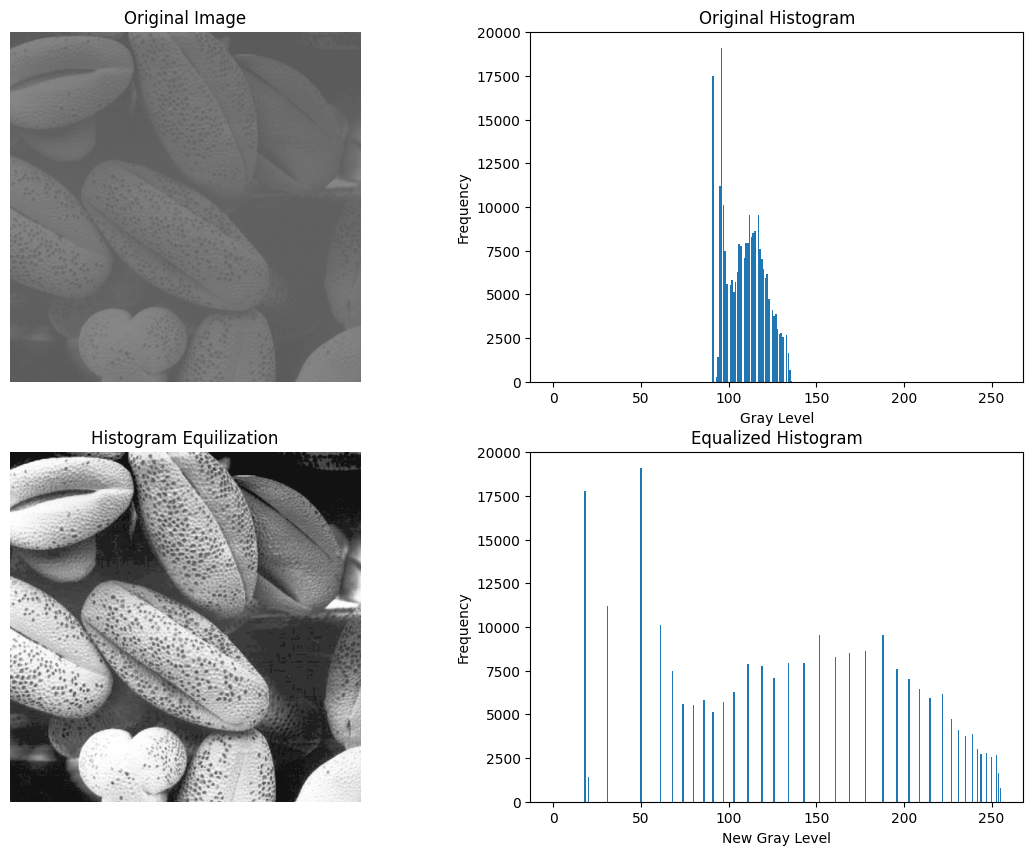

In [ ]:
def Histogram_Equilization(path:str):
    plt.figure(figsize=(14,10))
    img = cv2.imread(path,0)
    imshow("Original Image", img, subplot=True, row=2, col=2, num=1)

    freq = {}
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            r = img[row][col]
            if r in freq:
                freq[r] += 1
            else:
                freq[r] = 1
    for i in range(256):
        if i not in freq:
            freq[i] = 0
    plt.subplot(2,2,2)
    plt.bar(freq.keys(), freq.values())
    plt.title("Original Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Frequency")

    data = {
        "GrayLevel":list(freq.keys()),
        "Nk":list(freq.values())
    }
    df = pd.DataFrame(data)
    df = df.sort_values(by="GrayLevel")
    df.reset_index(inplace=True, drop=True)
    df["PDF"] = df["Nk"]/(img.shape[0]*img.shape[1])
    df["CDF"] = df["PDF"].cumsum()
    df["Sk"] = df["CDF"]*255
    df["New_Histogram"] = df["Sk"].apply(lambda x:round(x))
    plt.subplot(2,2,4)
    grouped_df = df[['New_Histogram', 'Nk']].groupby('New_Histogram').sum().reset_index()
    plt.bar(grouped_df['New_Histogram'], grouped_df['Nk'])
    plt.title("Equalized Histogram")
    plt.xlabel("New Gray Level")
    plt.ylabel("Frequency")
    freq = {}
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            r = img[row][col]
            img[row][col] = df.loc[r,"New_Histogram"]
    imshow("Histogram Equilization", img, row=2, col=2, num=3, subplot=True)

Histogram_Equilization("/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif")

## END